[IPython Notebook](ORB.ipynb) |  [Python Script](ORB.py)

ORB Datasets and Options
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.default_binary()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Dataset Parameters
--------------------------

Let's create the ParameterSet which would be added to the Bundle when calling add_dataset. Later we'll call add_dataset, which will create and attach this ParameterSet for us.

In [3]:
ps, constraints = phoebe.dataset.orb()
print ps

ParameterSet: 1 parameters
                  times@_default: [] d


### times

In [4]:
print ps['times']

ParameterSet: 0 parameters
NO PARAMETERS


### enabled

In [5]:
print ps['enabled']

ParameterSet: 0 parameters
NO PARAMETERS


Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to dynamics and the ORB dataset

In [6]:
ps_compute = phoebe.compute.phoebe()
print ps_compute

ParameterSet: 23 parameters
                enabled@_default: True
                 dynamics_method: keplerian
                            ltte: False
                              gr: False
                        stepsize: 0.01
                      integrator: ias15
                            refl: False
                      store_mesh: False
            mesh_method@_default: marching
                  delta@_default: 0.1
              maxpoints@_default: 100000
      distortion_method@_default: roche
               gridsize@_default: 40
                     mesh_offset: True
                  eclipse_method: native
                    atm@_default: ck2004
              lc_method@_default: numerical
             fti_method@_default: None
  fti_oversample@_default@_de...: 5
     rv_method@_default@_default: flux-weighted
       rv_grav@_default@_default: False
    etv_method@_default@_default: crossing
       etv_tol@_default@_default: 0.0001 d


### dynamics_method

In [7]:
print ps_compute['dynamics_method']

Parameter: dynamics_method
                       Qualifier: dynamics_method
                     Description: Which method to use to determine the dynamics of components
                           Value: keplerian
                         Choices: keplerian, nbody, rebound, bs



The 'dynamics_method' parameter controls how stars and components are placed in the coordinate system as a function of time and has several choices:
 * keplerian (default): Use Kepler's laws to determine positions.  If the system has more than two components, then each orbit is treated independently and nested (ie there are no dynamical/tidal effects - the inner orbit is treated as a single point mass in the outer orbit).
 * nbody: Use an n-body integrator to determine positions.  Here the initial conditions (positions and velocities) are still defined by the orbit's Keplerian parameters at 't0@system'.  Closed orbits and orbital stability are not guaranteed and ejections can occur.

### ltte

In [8]:
print ps_compute['ltte']

Parameter: ltte
                       Qualifier: ltte
                     Description: Correct for light travel time effects
                           Value: False



The 'ltte' parameter sets whether light travel time effects (Roemer delay) are included.  If set to False, the positions and velocities are returned as they actually are for that given object at that given time.  If set to True, they are instead returned as they were or will be when their light reaches the origin of the coordinate system.

See the [Systemic Velocity Example Script](../examples/vgamma) for an example of how 'ltte' and 'vgamma' (systemic velocity) interplay.

### orbiterror

The 'orbiterror' parameter is only relevant if dynamics_method=='nbody' (so will not be available unless that is the case)

In [9]:
print ps_compute['orbiterror']

ParameterSet: 0 parameters
NO PARAMETERS


### stepsize

The 'stepsize' parameter is also only relevenat if dynamics_method=='nbody' (so will not be available unless that is the case)

In [10]:
print ps_compute['stepsize']

Parameter: stepsize
                       Qualifier: stepsize
                     Description: stepsize for the N-body integrator
                           Value: 0.01
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: dynamics_method:nbody



Synthetics
------------------

In [11]:
b.add_dataset('orb', times=np.linspace(0,3,201))

<ParameterSet: 2 parameters | components: primary, secondary>

In [12]:
b.add_compute()

<ParameterSet: 17 parameters | components: primary, secondary>

In [13]:
b.run_compute()

<ParameterSet: 14 parameters | components: primary, secondary>

In [14]:
b['orb@model'].twigs

['times@primary@orb01@phoebe01@latest@orb@model',
 'xs@primary@orb01@phoebe01@latest@orb@model',
 'ys@primary@orb01@phoebe01@latest@orb@model',
 'zs@primary@orb01@phoebe01@latest@orb@model',
 'vxs@primary@orb01@phoebe01@latest@orb@model',
 'vys@primary@orb01@phoebe01@latest@orb@model',
 'vzs@primary@orb01@phoebe01@latest@orb@model',
 'times@secondary@orb01@phoebe01@latest@orb@model',
 'xs@secondary@orb01@phoebe01@latest@orb@model',
 'ys@secondary@orb01@phoebe01@latest@orb@model',
 'zs@secondary@orb01@phoebe01@latest@orb@model',
 'vxs@secondary@orb01@phoebe01@latest@orb@model',
 'vys@secondary@orb01@phoebe01@latest@orb@model',
 'vzs@secondary@orb01@phoebe01@latest@orb@model']

In [15]:
print b['times@primary@orb01@orb@model']

Parameter: times@primary@latest@model
                       Qualifier: times
                     Description: Synthetic times
                           Value: [ 0.     0.015  0.03   0.045  0.06   0.075  0.09   0.105  0.12   0.135
  0.15   0.165  0.18   0.195  0.21   0.225  0.24   0.255  0.27   0.285  0.3
  0.315  0.33   0.345  0.36   0.375  0.39   0.405  0.42   0.435  0.45
  0.465  0.48   0.495  0.51   0.525  0.54   0.555  0.57   0.585  0.6    0.615
  0.63   0.645  0.66   0.675  0.69   0.705  0.72   0.735  0.75   0.765
  0.78   0.795  0.81   0.825  0.84   0.855  0.87   0.885  0.9    0.915
  0.93   0.945  0.96   0.975  0.99   1.005  1.02   1.035  1.05   1.065
  1.08   1.095  1.11   1.125  1.14   1.155  1.17   1.185  1.2    1.215
  1.23   1.245  1.26   1.275  1.29   1.305  1.32   1.335  1.35   1.365
  1.38   1.395  1.41   1.425  1.44   1.455  1.47   1.485  1.5    1.515
  1.53   1.545  1.56   1.575  1.59   1.605  1.62   1.635  1.65   1.665
  1.68   1.695  1.71   1.725  1.74   1.755  1.

In [16]:
print b['xs@primary@orb01@orb@model']

Parameter: xs@primary@latest@model
                       Qualifier: xs
                     Description: X position
                           Value: [  2.44929360e-16  -1.25643036e-01  -2.51162078e-01  -3.76433253e-01
  -5.01332934e-01  -6.25737860e-01  -7.49525258e-01  -8.72572966e-01
  -9.94759549e-01  -1.11596442e+00  -1.23606798e+00  -1.35495168e+00
  -1.47249821e+00  -1.58859156e+00  -1.70311717e+00  -1.81596200e+00
  -1.92701470e+00  -2.03616566e+00  -2.14330718e+00  -2.24833351e+00
  -2.35114101e+00  -2.45162821e+00  -2.54969596e+00  -2.64524746e+00
  -2.73818842e+00  -2.82842712e+00  -2.91587451e+00  -3.00044428e+00
  -3.08205297e+00  -3.16062005e+00  -3.23606798e+00  -3.30832230e+00
  -3.37731170e+00  -3.44296811e+00  -3.50522672e+00  -3.56402610e+00
  -3.61930821e+00  -3.67101850e+00  -3.71910594e+00  -3.76352308e+00
  -3.80422607e+00  -3.84117474e+00  -3.87433264e+00  -3.90366705e+00
  -3.92914900e+00  -3.95075336e+00  -3.96845881e+00  -3.98224786e+00
  -3.99210691e+00  -3

In [17]:
print b['vxs@primary@orb01@orb@model']

Parameter: vxs@primary@latest@model
                       Qualifier: vxs
                     Description: X velocity
                           Value: [ -8.37758041e+00  -8.37344658e+00  -8.36104917e+00  -8.34040041e+00
  -8.31152069e+00  -8.27443849e+00  -8.22919043e+00  -8.17582115e+00
  -8.11438332e+00  -8.04493757e+00  -7.96755244e+00  -7.88230430e+00
  -7.78927727e+00  -7.68856317e+00  -7.58026139e+00  -7.46447880e+00
  -7.34132968e+00  -7.21093554e+00  -7.07342509e+00  -6.92893402e+00
  -6.77760492e+00  -6.61958715e+00  -6.45503665e+00  -6.28411580e+00
  -6.10699329e+00  -5.92384392e+00  -5.73484842e+00  -5.54019333e+00
  -5.34007073e+00  -5.13467813e+00  -4.92421821e+00  -4.70889869e+00
  -4.48893206e+00  -4.26453539e+00  -4.03593014e+00  -3.80334192e+00
  -3.56700025e+00  -3.32713839e+00  -3.08399304e+00  -2.83780416e+00
  -2.58881472e+00  -2.33727042e+00  -2.08341953e+00  -1.82751255e+00
  -1.56980203e+00  -1.31054231e+00  -1.04998924e+00  -7.88399962e-01
  -5.26032626e-01  

Plotting
---------------

By default, ORB datasets plot as 'ys' vx 'xs' (plane of sky).  Notice the y-scale here with inclination set to 90.

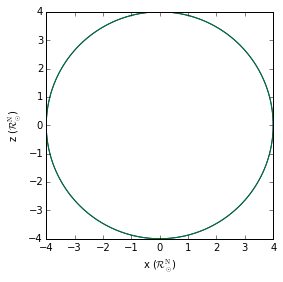

In [18]:
axs, artists = b['orb@model'].plot()

As always, you have access to any of the arrays for either axes, so if you want to plot 'vxs' vs 'times'

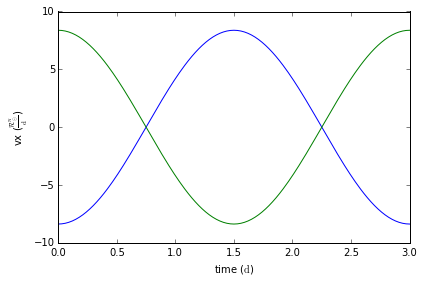

In [19]:
axs, artists = b['orb@model'].plot(x='times', y='vxs')

3d axes are not yet supported for orbits, but hopefully will be soon.

Once they are supported, they will default to x, y, and z positions plotted on their respective axes.

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


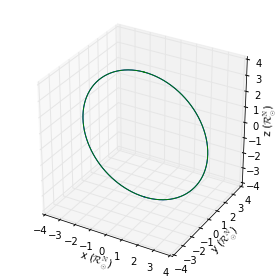

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

axs, artists = b['orb@model'].plot(xlim=(-4,4), ylim=(-4,4), zlim=(-4,4))